Import packages including the disaggregation algorithms and API

In [1]:
%matplotlib inline
from nilmtk.disaggregate import Disaggregator
from nilmtk.disaggregate.seq2seq import Seq2Seq
from nilmtk.disaggregate.proposed_CNN import CNN_MODULE
from nilmtk.disaggregate.dae import DAE
from nilmtk.api import API

d:\Anaconda3\envs\nilmtk-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Then configure the API and start training, please ensure the relative path of dataset is correct.

Joint Testing for all algorithms
Loading data for  ukdale  dataset
Dropping missing values
Generating predictions for : CNN
Inference Time Consumption: 0.0019986629486083984s.
Generating predictions for : DAE
Inference Time consumption: 0.017999649047851562s.
Generating predictions for : Seq2Seq
Inference Time Consumption: 0.002000570297241211s.
............  mae  ..............
                 Proposed        DAE    Seq2Seq
washing machine  21.92856  25.277161  15.635983
............  rmse  ..............
                  Proposed         DAE    Seq2Seq
washing machine  88.503561  107.470885  73.867134
............  f1score  ..............
                 Proposed       DAE   Seq2Seq
washing machine  0.770298  0.722747  0.826162
............  recall  ..............
                 Proposed       DAE   Seq2Seq
washing machine  0.758993  0.746266  0.865596
............  precision  ..............
                 Proposed       DAE   Seq2Seq
washing machine  0.781946  0.700666  0.790

d:\Anaconda3\envs\nilmtk-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


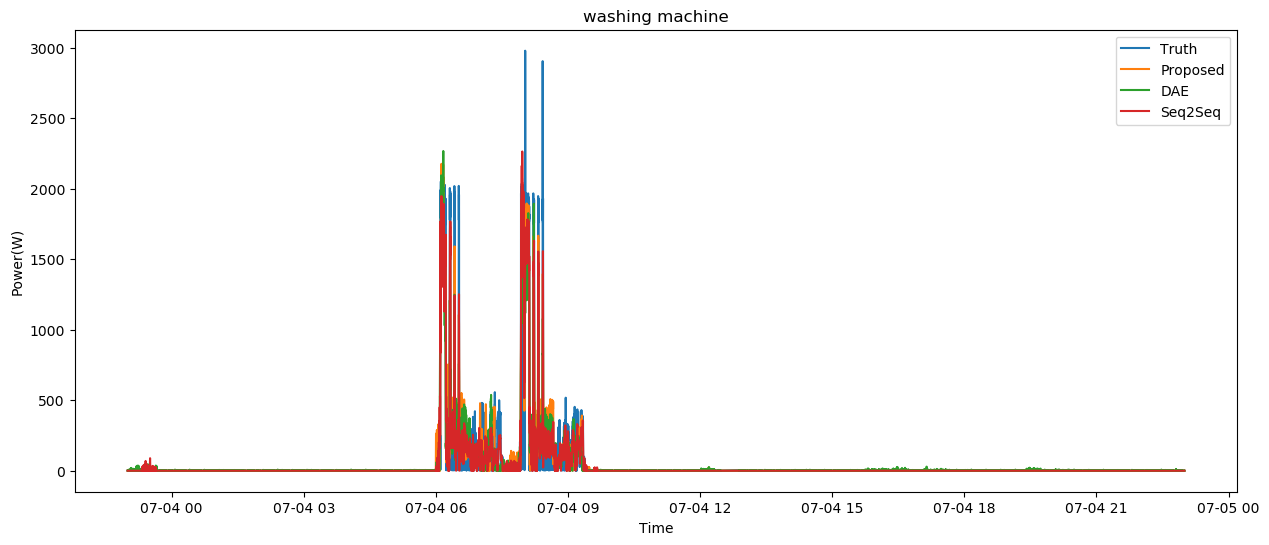

In [3]:
if __name__ =='__main__':
    on_thresh = {'fridge':50, 'kettle':2000, 'dish washer':10, 'microwave':200, 'washing machine':20}
    experiment = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 6,
    'appliances': ['washing machine'],
    # Universally no pre-training
    'pre_trained':False,
    # Specify algorithm hyper-parameters
    'methods':{"Proposed":CNN_MODULE({'n_epochs':10, 'batch_size':256, 'sequence_length':200, 'on_threshold':on_thresh}),
               "DAE":DAE({'n_epochs':10, 'batch_size':256, 'sequence_length':200, 'on_threshold':on_thresh}),
               "Seq2Seq":Seq2Seq({'n_epochs':10, 'batch_size':256, 'sequence_length':200, 'on_threshold':on_thresh})
               },
    # Specify train and test data
    'train': {
        'datasets':{
        'ukdale': {
            'path': 'data/ukdale.h5',
            'buildings': {
                1: {
                        'start_time': '2013-06-01',
                        'end_time': '2013-07-01'
                }
            }
            },      
        }
    },
    'test': {
        'datasets':{
        'ukdale': {
            'path': 'data/ukdale.h5',
            'buildings': {
                1: {
                        'start_time': '2013-07-04',
                        'end_time': '2013-07-05'
                }
            }
            },
            
    },
    # Specify evaluation metrics
    'metrics': ['mae','rmse','f1score','recall','precision','MCC']
    }
    }

    api_experiment_1 = API(experiment)